# Практика EDA

Сегодня рассмотрим набор данных о намерениях покупки онлайн-покупателей

## Сбор данных

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


* `Administrative` - Количество просмотренных страниц административного типа: правила, политика, FAQ и т.д
* `Administrative_Duration` - Общее время (в секундах), которое пользователь провёл на административных страницах
* `Informational` - Количество просмотренных информационных страниц: инструкции, справочные материалы, как пользоваться товаром и т.п.
* `Informational_Duration` - Сколько секунд пользователь суммарно провёл на этих информационных страницах.
* `ProductRelated` - Количество просмотренных товарных страниц: собственно страницы с товарами.
* `ProductRelated_Duration` - Время, проведённое на товарных страницах.
* `BounceRates` - Это вероятность, что пользователь уйдёт сразу после попадания на страницу (значение в диапазоне [0,1]).
* `ExitRates` - вероятность, что пользователь покинет сайт после конкретной страницы.
* `PageValues` - Числовой показатель ценности страниц,чем выше, тем выше вероятность, что просмотр такой страницы приводит к продаже.
* `SpecialDay` - Насколько близко дата посещения к большому празднику (например, День матери, Рождество). Значение от 0 до 1: 0 — далеко от праздника 1 — очень близко (в пределах нескольких дней)
* `Month` - Месяц визита в формате строк
* `OperatingSystems` - Код ОС, с которой зашёл пользователь (1–8).
* `Browser` - Код браузера (1–13) 
* `Region` - Регион пользователя (1–9).
* `TrafficType` - Тип трафика (1–20).
* `VisitorType`- Тип посетителя: Returning_Visitor, New_Visitor, Other
* `Weekend` - Логический признак: True — посетил сайт в выходной, False — в будний.
* `Revenue`  - **Главный целевой признак**.
True — пользователь совершил покупку
False — не совершил.                                

## EDA-анализ

In [ ]:
df.shape # 18 столбцов

(12330, 18)

Преобразуем категориальные признаки в числовые

In [21]:
def one_hot_encode(df, columns):
    return pd.get_dummies(df, columns=columns, drop_first=True,dtype = int)

def label_encode(df, columns):
    df = df.copy()
    for col in columns:
        df[col] = df[col].astype('category').cat.codes
    return df


* `Month - One-Hot Encoding`.  Месяцы - это номинальная категория без числового смысла. «Февраль» не больше или меньше «Ноября».
* `VisitorType - One-Hot Encoding`. номинальная категория, и никакого порядка между ними нет
* `OperatingSystems - Label Encoding`. это уже числа
* `Browser - Label Encoding`. Категории, закодированные цифрами 1–13
* `Region - Label Encoding`. Всего 9 регионов, тоже номинальный код.
* `TrafficType - Label Encoding`.  тип графика можно представить числами, а также не хочется иметь лишних 20 столбцов 
* `Weekend` и `Revenue` - преобразовал из булевых значений в int

In [26]:
df_encoded = df.copy()

In [27]:
df_encoded = one_hot_encode(df,['Month','VisitorType'])
df_encoded = label_encode(df_encoded,["OperatingSystems", "Browser", "Region", "TrafficType"])
df_encoded["Weekend"] = df_encoded["Weekend"].astype(int)
df_encoded["Revenue"] = df_encoded["Revenue"].astype(int)

In [28]:
df_encoded.info() # пропущенных значений нет, работаем дальше

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int8   
 11  Browser                        12330 non-null  int8   
 12  Region                         12330 non-null 

In [30]:
df_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,1,0,0,0,1


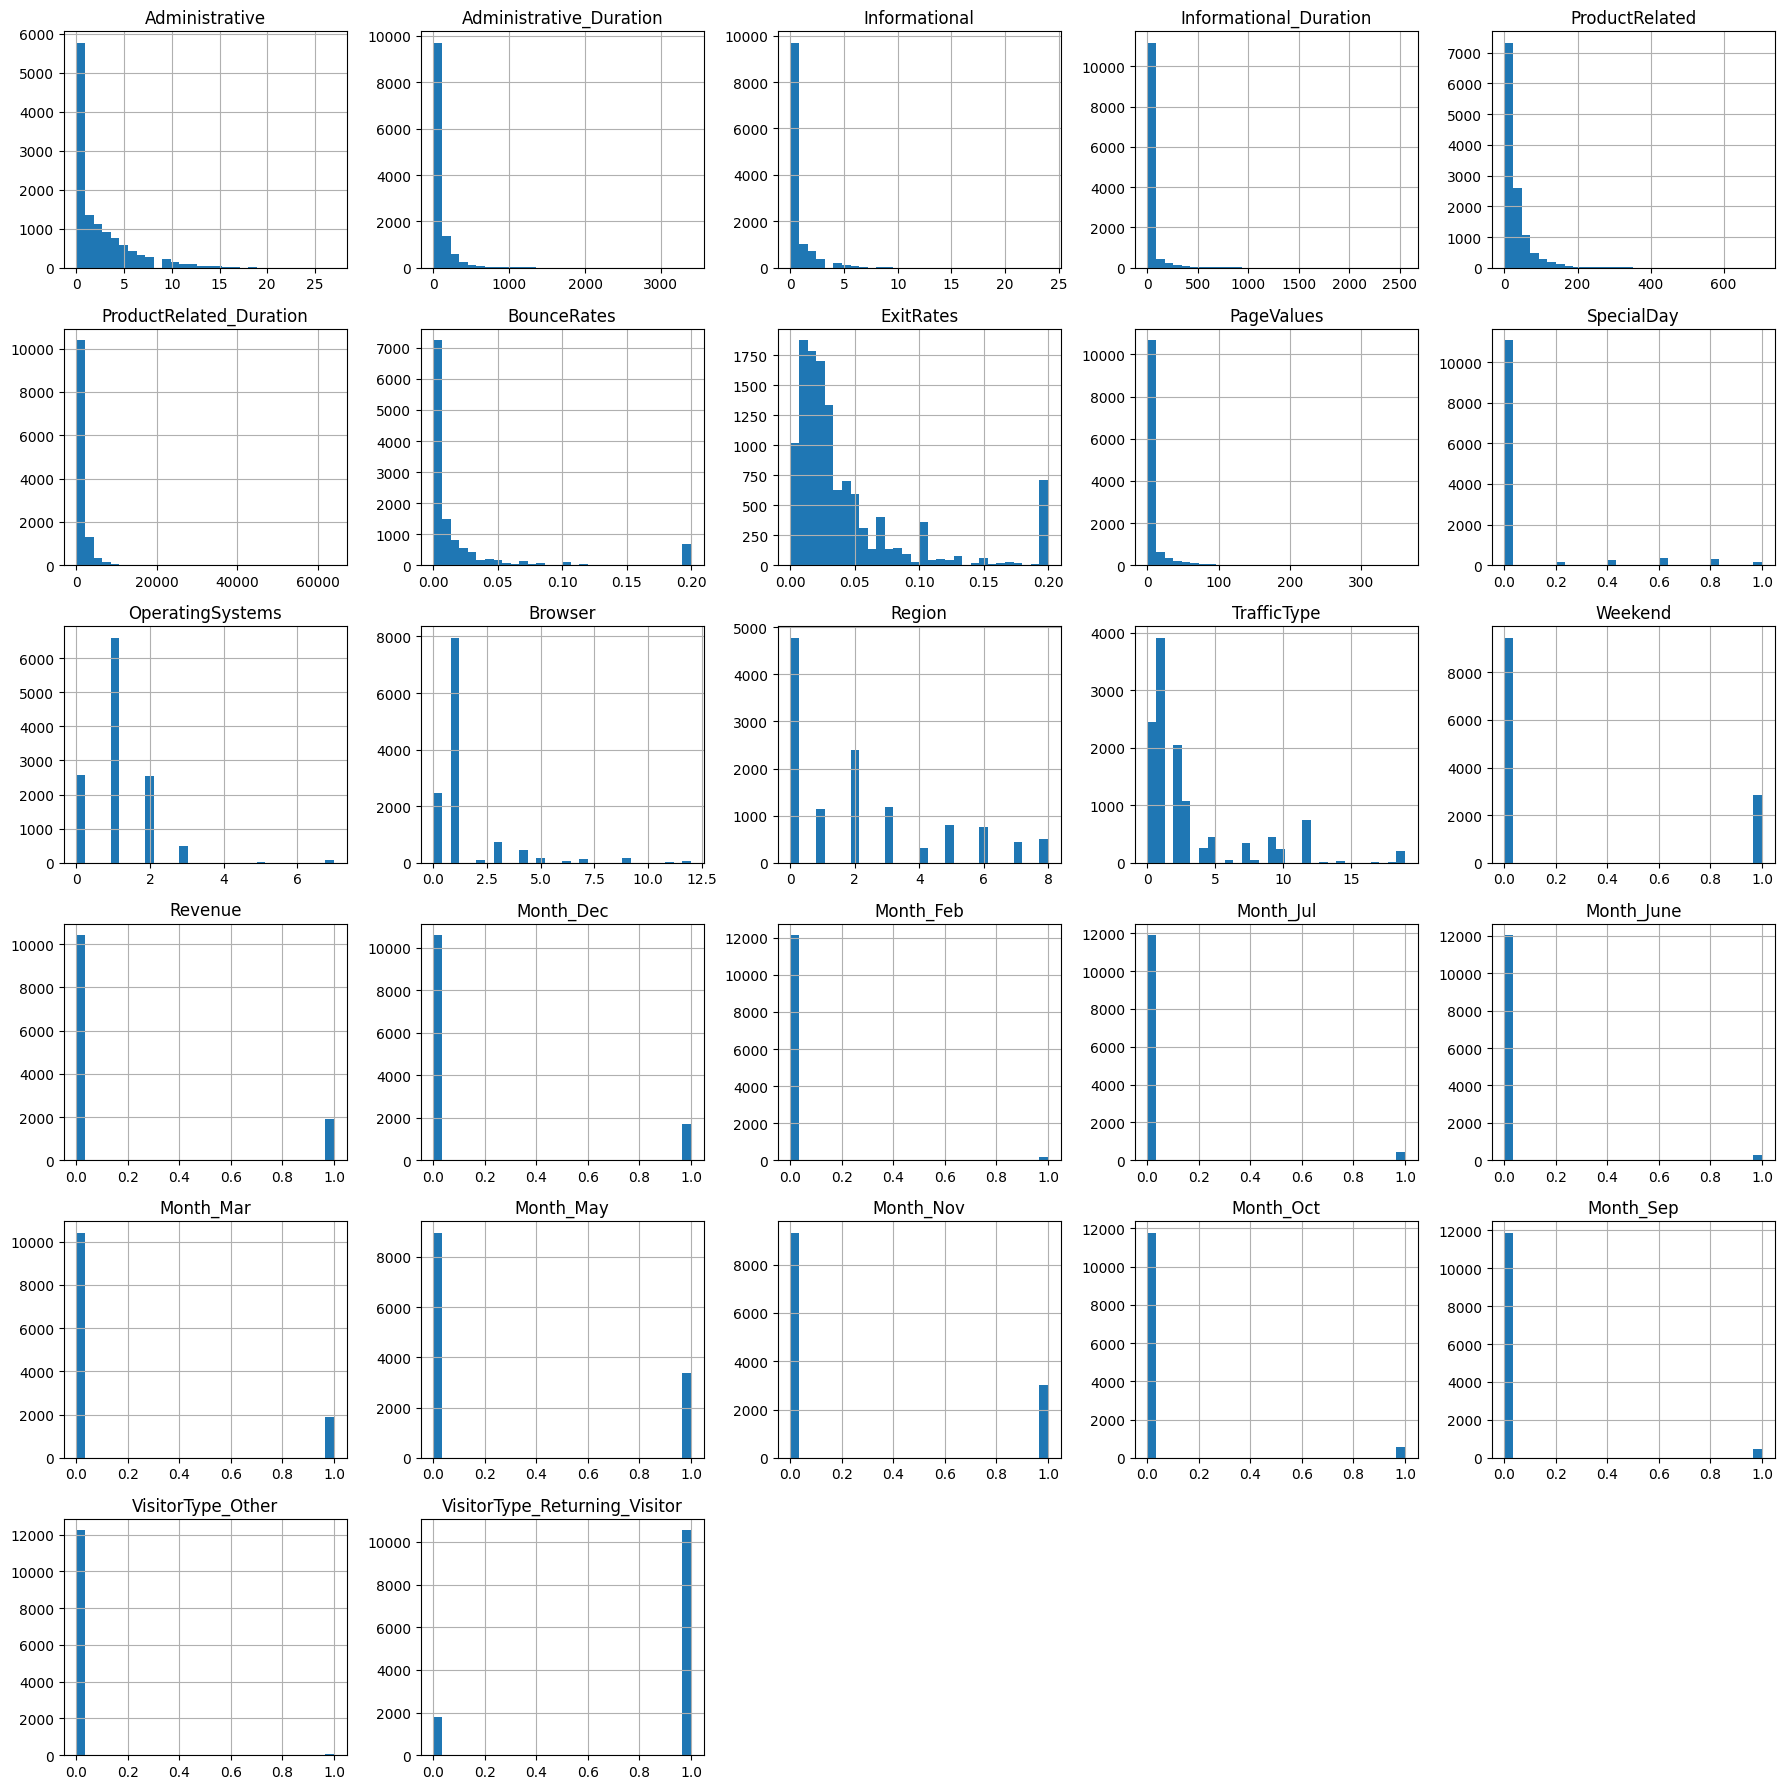

In [31]:
# Распределения числовых признаков (гистограммы)
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns

df_encoded[numeric_cols].hist(figsize=(18, 18), bins=30)
plt.tight_layout()
plt.show()


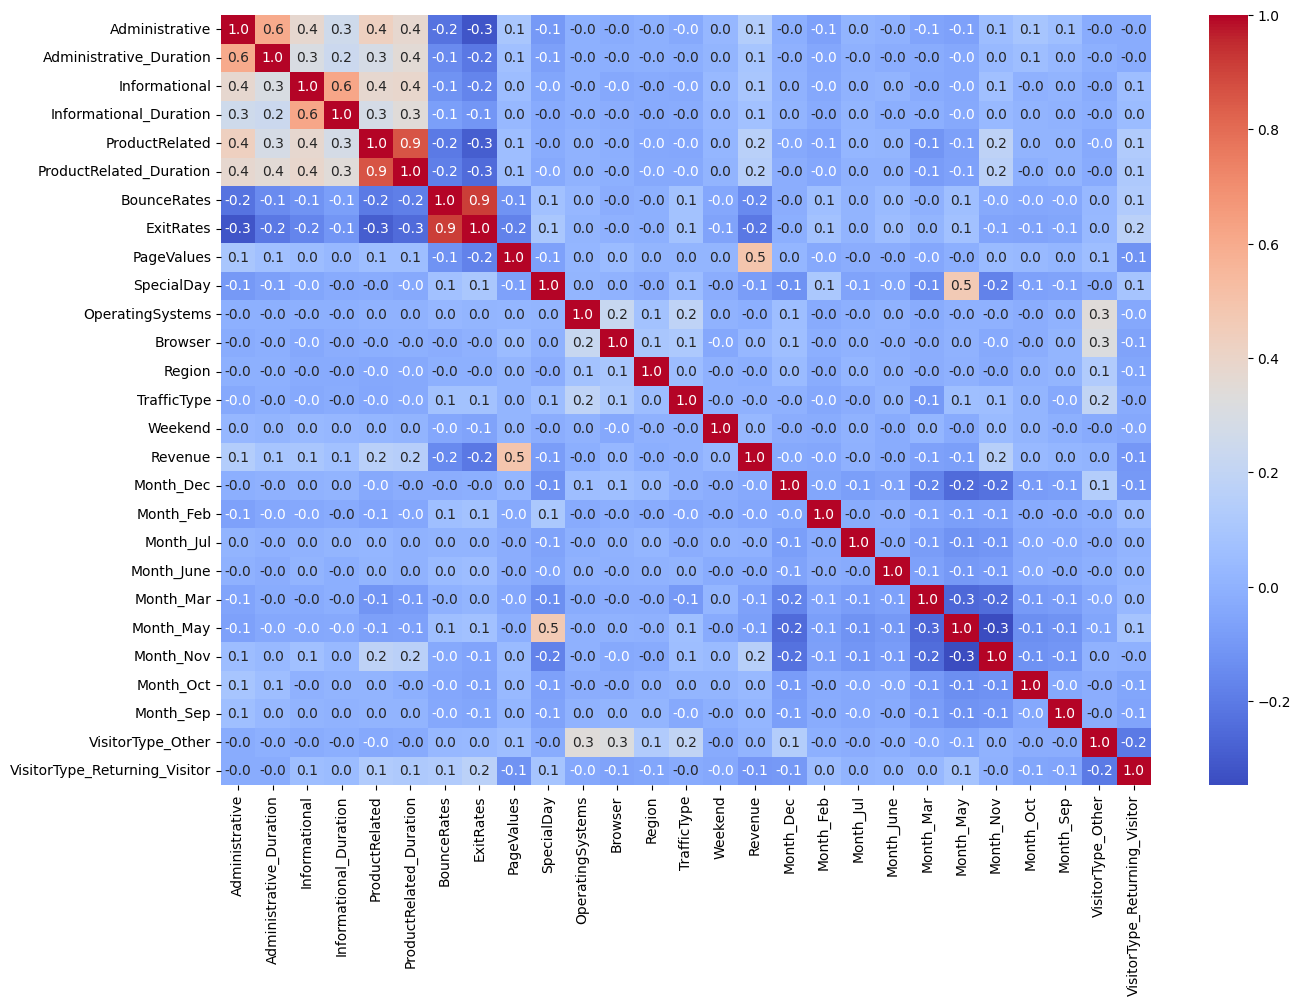

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot = True, fmt = ".1f")
plt.show()

In [33]:
X = df_encoded.drop('Revenue',axis=1)
y = df_encoded['Revenue']

feat_importances

In [34]:
from sklearn.ensemble import RandomForestRegressor

rndForest = RandomForestRegressor(n_estimators=100, random_state=43)
rndForest.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rndForest.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
8,PageValues,0.430897
5,ProductRelated_Duration,0.082406
7,ExitRates,0.074527
6,BounceRates,0.067228
4,ProductRelated,0.064879
1,Administrative_Duration,0.055981
0,Administrative,0.038076
12,Region,0.027201
13,TrafficType,0.025268
3,Informational_Duration,0.025171


In [35]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rndForest, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

PageValues:1.1375 
Month_Nov:0.2378 
ProductRelated_Duration:0.1953 
ProductRelated:0.1874 
BounceRates:0.1858 
ExitRates:0.1802 
Administrative_Duration:0.1395 
Administrative:0.1100 
TrafficType:0.0469 
Region:0.0446 
Informational_Duration:0.0345 
Informational:0.0242 
VisitorType_Returning_Visitor:0.0231 
Browser:0.0217 
OperatingSystems:0.0204 
Month_Mar:0.0204 
Weekend:0.0202 
Month_May:0.0132 
Month_Sep:0.0113 
Month_Dec:0.0111 
Month_Jul:0.0095 
Month_Oct:0.0034 
SpecialDay:0.0026 
Month_June:0.0025 
VisitorType_Other:0.0006 
Month_Feb:0.0001 


* Больше всего PageValues коррелирует с целевой переменной
* Меньше всего у Month_Feb

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

gradBoost = GradientBoostingRegressor(random_state=11)
gradBoost.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': gradBoost.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
8,PageValues,0.763185
21,Month_Nov,0.046161
6,BounceRates,0.044606
5,ProductRelated_Duration,0.028148
0,Administrative,0.025036
4,ProductRelated,0.023181
7,ExitRates,0.022074
1,Administrative_Duration,0.011481
25,VisitorType_Returning_Visitor,0.008389
20,Month_May,0.007616


In [37]:
from sklearn.inspection import permutation_importance

res = permutation_importance(gradBoost, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

PageValues:0.8780 
Month_Nov:0.0400 
ProductRelated_Duration:0.0263 
ExitRates:0.0227 
BounceRates:0.0188 
Administrative:0.0173 
ProductRelated:0.0140 
Administrative_Duration:0.0114 
VisitorType_Returning_Visitor:0.0055 
Month_May:0.0054 
TrafficType:0.0045 
Informational:0.0034 
Informational_Duration:0.0031 
Month_Mar:0.0028 
Browser:0.0016 
Month_Sep:0.0016 
Region:0.0014 
Month_June:0.0014 
Month_Dec:0.0007 
OperatingSystems:0.0006 
Month_Jul:0.0004 
Month_Oct:0.0004 
Weekend:0.0003 
VisitorType_Other:0.0002 
SpecialDay:0.0001 
Month_Feb:0.0000 


На градиентом бустенге примерно такие же результаты как у ансмабля деревьев

# **Обучение**

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from catboost import CatBoostClassifier


cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


preprocess = ColumnTransformer([
    ('ohe', OneHotEncoder(drop="first"), cat_cols),
    ('scale', StandardScaler(), num_cols)
])

models = {
    "LogReg": LogisticRegression(max_iter=2000),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "SVM": SVC(probability=True),
    
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    ),
    
    "CatBoost": CatBoostClassifier(
        iterations=300,
        depth=6,
        learning_rate=0.05,
        loss_function='Logloss',
        verbose=False,
        random_seed=42
    )
}


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



results = []

for name, model in models.items():

    if name == "CatBoost":
        # CatBoost работает напрямую с категориальными фичами
        model.fit(X_train, y_train, cat_features=cat_cols)
        pred = model.predict(X_test)
        pred_proba = model.predict_proba(X_test)[:, 1]

    else:
        # Все остальные — через единый пайплайн
        pipe = Pipeline([
            ('prep', preprocess),
            ('model', model)
        ])
        pipe.fit(X_train, y_train)
        pred = pipe.predict(X_test)
        pred_proba = pipe.predict_proba(X_test)[:, 1]

    results.append({
        'model': name,
        'accuracy': accuracy_score(y_test, pred),
        'precision': precision_score(y_test, pred),
        'recall': recall_score(y_test, pred),
        'f1': f1_score(y_test, pred),
        'roc_auc': roc_auc_score(y_test, pred_proba)
    })



results_df = pd.DataFrame(results).sort_values('f1', ascending=False)
print(results_df)

          model  accuracy  precision    recall        f1   roc_auc
3       XGBoost  0.900649   0.714734  0.596859  0.650499  0.926654
1  RandomForest  0.903082   0.747405  0.565445  0.643815  0.918628
4      CatBoost  0.899432   0.714744  0.583770  0.642651  0.930182
2           SVM  0.886456   0.709016  0.452880  0.552716  0.879843
0        LogReg  0.879157   0.730769  0.348168  0.471631  0.887855


* accuracy - лучший RandomForest
* precision - RandomForest 
* recall - XGBoost   
* f1 - XGBoost  
* roc_auc - CatBoost  